### IDs:
Insert yours IDs to the cell below

ID #1: 318299559

ID #2: 227367455


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
# Imports
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
from collections import defaultdict



%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0)

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [2]:
 def find_minimum_defective(prob_to_find,p_defective,nb_defective,limit=5_000):
    n = 0
    history = []
    nb_defective -= 1 # P(X ≥ n) = 1 - P(X < n) = 1 - P(X ≤ n - 1)
    for x in range(limit):
        val = 1 - binom.cdf(nb_defective, x, p_defective)
        history.append(val)
        if val > prob_to_find:
            return x, history
    return -1, history #we output 1 if there are more iterations than the limit or an error

prob = 0.85
p_defective = 0.03
at_least_X_defective = 1

x, history = find_minimum_defective(prob,p_defective,at_least_X_defective)
x

63

We should therefore ask for 63 samples.

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [3]:
x, history = find_minimum_defective(0.95, 0.04, 1)
x

74

We should therefore ask for 74 samples.

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

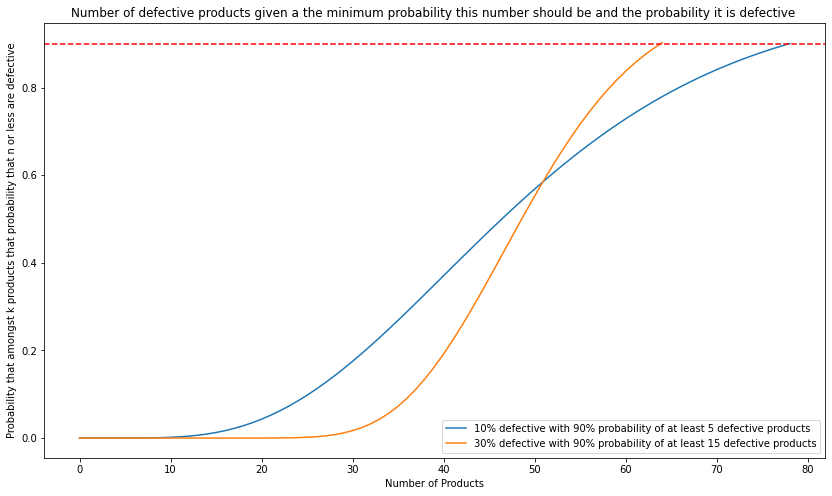

1: 78 
2: 64


In [4]:
x_1, history_1 = find_minimum_defective(0.9, 0.1, 5)
x_2, history_2 = find_minimum_defective(0.9, 0.3, 15)

plt.plot(history_1, label = "10% defective with 90% probability of at least 5 defective products")
plt.plot(history_2, label = "30% defective with 90% probability of at least 15 defective products")
plt.axhline(y=0.9, color='r', linestyle='--')
plt.legend()
plt.title("Number of defective products given a the minimum probability this number should be and the probability it is defective ")
plt.xlabel("Number of Products")
plt.ylabel("Probability that amongst k products that probability that n or less are defective")
plt.show()

print("1:", x_1,"\n2:", x_2)

We see that a probability three times as great for a defective product with at least 3 times more defective products in the batch leads to a rather significantly lower required number of samples. This is a direct result of the binomial formula, where the probability of a sample to be defective is more significant.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [5]:
import numpy as np
import scipy as sp
from scipy.stats import iqr

def add_stat(distribution, size):
    dist_object = dict(dist = distribution,
                       median = np.median(distribution),
                       size = size,
                       mean = distribution.mean(), 
                       std = distribution.std(),
                       var = distribution.var(),
                       iqr = np.percentile(distribution, 75) - np.percentile(distribution, 25))
    return dist_object

sh_size = 16000
sh_dist = np.array([4000, 4100, 4200, 4300, 4400, 4800, 7000, 7700, 7800, 14700] * (sh_size // 10))
sh = add_stat(sh_dist, sh_size)
print(f"SH mean:{sh['mean']}, SH median:{sh['median']}, SH IQR:{sh['iqr']}")

rg_size = 22000
rg_dist = np.array([1000, 1900, 2000, 2900, 3900 ,5300, 5500, 5600, 5800, 8100] * (rg_size // 10))
rg = add_stat(rg_dist, rg_size)
print(f"RG mean:{rg['mean']}, RG median:{rg['median']}, RG IQR:{rg['iqr']}")




SH mean:6300.0, SH median:4600.0, SH IQR:3500.0
RG mean:4200.0, RG median:4600.0, RG IQR:3600.0


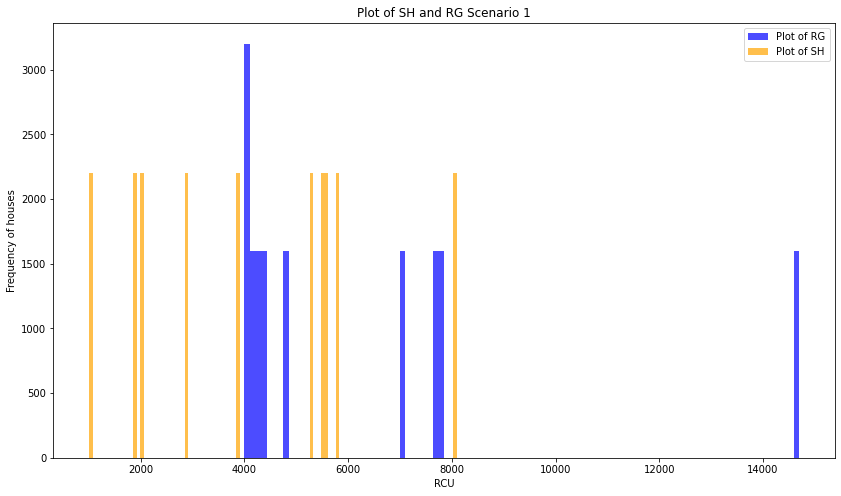

In [6]:
plt.hist(sh['dist'], bins=100, color = "blue", label = "Plot of RG", alpha = 0.7)
plt.hist(rg['dist'], bins=100, color = 'orange', label = "Plot of SH", alpha = 0.7)
plt.legend()
plt.title("Plot of SH and RG Scenario 1")
plt.xlabel("RCU")
plt.ylabel("Frequency of houses")
plt.show()

In [7]:
# Create Second scenario
sh2_size = 16000
sh2_dist = np.array([4200, 4300, 4400, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 23500] * (sh2_size // 11))
sh2 = add_stat(sh2_dist, sh2_size)

print(f"SH mean:{sh2['mean']}, SH median:{sh2['median']}, SH IQR:{sh2['iqr']}")

rg2_size = 22000
rg2_dist = np.array([1000, 1100, 1500, 2900, 3900, 4600, 5300, 5600, 5900, 6400, 8000] * (rg2_size // 11))
rg2 = add_stat(rg2_dist, rg2_size)

print(f"RG mean:{rg2['mean']}, RG median:{rg2['median']}, RG IQR:{rg2['iqr']}")

SH mean:6300.0, SH median:4600.0, SH IQR:500.0
RG mean:4200.0, RG median:4600.0, RG IQR:4400.0


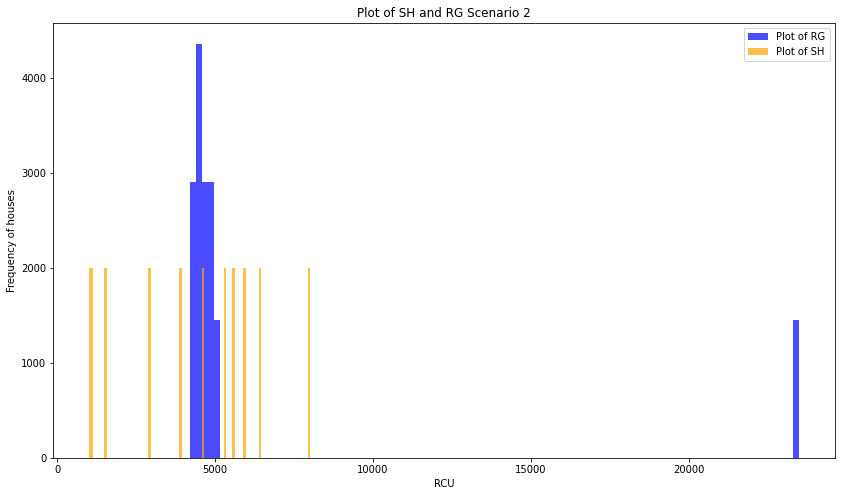

In [8]:
plt.hist(sh2['dist'], bins=100, color = "blue", label = "Plot of RG", alpha = 0.7)
plt.hist(rg2['dist'], bins=100, color = 'orange', label = "Plot of SH", alpha = 0.7)
plt.legend()
plt.title("Plot of SH and RG Scenario 2")
plt.xlabel("RCU")
plt.ylabel("Frequency of houses")
plt.show()

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [9]:
## Create Third scenario
sh3_size = 16000
sh3_dist = np.array([2200, 4000, 4100, 4400, 4500, 4700, 5100, 7200, 8800, 18000] * (sh3_size // 10))
sh3 = add_stat(sh3_dist, sh3_size)

print(f"SH mean:{sh3['mean']}, SH median:{sh3['median']}, SH IQR:{sh3['iqr']}, SH variance:{int(sh3['var'])}")

rg3_size = 22000
rg3_dist = np.array([700, 1000, 2100, 3000, 4400 ,4800, 5600, 5900, 6100, 8400] * (rg3_size // 10))
rg3 = add_stat(rg3_dist, rg3_size)

print(f"RG mean:{rg3['mean']}, RG median:{rg3['median']}, RG IQR:{rg3['iqr']}, RG variance:{int(rg3['var'])}")

SH mean:6300.0, SH median:4600.0, SH IQR:3100.0, SH variance:18174000
RG mean:4200.0, RG median:4600.0, RG IQR:3800.0, RG variance:5484000


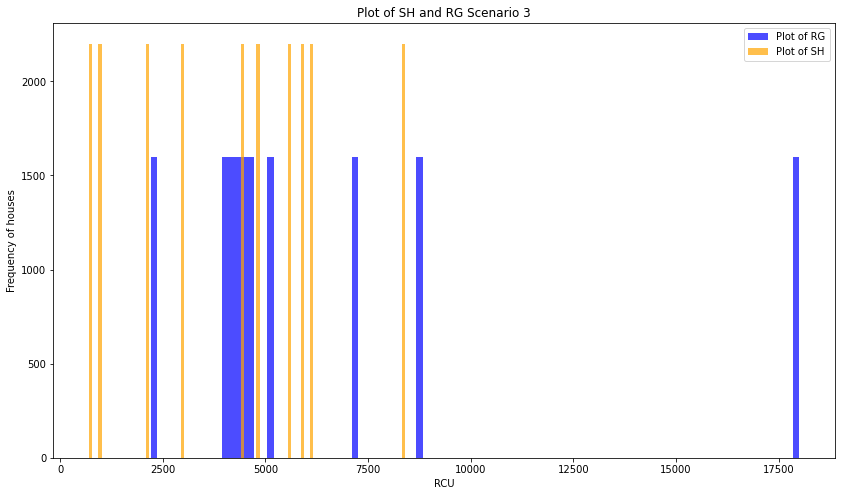

In [10]:
plt.hist(sh3['dist'], bins=100, color = "blue", label = "Plot of RG", alpha = 0.7)
plt.hist(rg3['dist'], bins=100, color = 'orange', label = "Plot of SH", alpha = 0.7)
plt.legend()
plt.title("Plot of SH and RG Scenario 3")
plt.xlabel("RCU")
plt.ylabel("Frequency of houses")
plt.show()

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [21]:
sh4 = dict(size=16000)
rg4 = dict(size=22000)

# Create SH scenario
sh4['dist'] = np.array([120,280,450,3700,4000,4000,8000,8400,8600,9050,9500] * int(sh['size'] / 11))
sh4['PHI_dist'] = np.array([5200,6300,8000,11000,12000,12000,14000,15700,16300,18000,19000]*int(sh['size']/11))
sh4.update(dict(median = np.median(sh4['dist']), 
               mean = sh4['dist'].mean(), 
               std = sh4['dist'].std(),
               iqr = np.percentile(sh4['dist'],75) - np.percentile(sh4['dist'],25),
               PHI_median = np.median(sh4['PHI_dist']), 
               PHI_mean = sh4['PHI_dist'].mean(), 
               PHI_std = sh4['PHI_dist'].std(),
               PHI_iqr = np.percentile(sh4['PHI_dist'],75) - np.percentile(sh4['PHI_dist'],25)))
print(f"SH mean:{sh4['mean']}, SH STD:{int(sh4['std'])}, SH median:{sh4['median']}, SH IQR:{sh4['iqr']}, SH variance:{int(sh4['std']**2)}")
print(f"SH PHI mean:{sh4['PHI_mean']}, SH STD:{int(sh4['PHI_std'])}, SH median:{sh4['PHI_median']}, SH IQR:{sh4['PHI_iqr']}, SH variance:{int(sh4['PHI_std']**2)}")


# Create RG scenario
rg4['dist'] = np.array([120,380,580,820,3900,4000,4300,4500,4600,8400,9100]*int(rg['size']/11))
rg4['PHI_dist'] = np.array([600,1000,1500,1800,2200,8000,10500,11800,17200,19100,19800]*int(rg['size']/11))
rg4.update(dict(median = np.median(rg4['dist']), 
               mean = rg4['dist'].mean(), 
               std = rg4['dist'].std(),
               iqr = np.percentile(rg4['dist'],75) - np.percentile(rg4['dist'],25)),
               PHI_median = np.median(rg4['PHI_dist']), 
               PHI_mean = rg4['PHI_dist'].mean(), 
               PHI_std = rg4['PHI_dist'].std(),
               PHI_iqr = np.percentile(rg4['PHI_dist'],75) - np.percentile(rg4['PHI_dist'],25))
print(f"RG mean:{rg4['mean']}, RG STD:{int(rg4['std'])} RG median:{rg4['median']}, RG IQR:{rg4['iqr']}, RG variance:{int(rg4['std']**2)}")
print(f"RG PHI mean:{rg4['PHI_mean']}, RG STD:{int(rg4['PHI_std'])} RG median:{rg4['PHI_median']}, RG IQR:{rg4['PHI_iqr']}, RG variance:{int(rg4['PHI_std']**2)}")


sh_cov = np.cov(sh4['dist'],sh4['PHI_dist'])[0,1]
rg_cov = np.cov(rg4['dist'],rg4['PHI_dist'])[0,1]
sh_COV = 0.97 * sh4['dist'].std() * sh4['PHI_dist'].std() # the root of the variance is the standard deviation
rg_COV = 0.97 * rg4['dist'].std() * rg4['PHI_dist'].std()
sh_diff = (sh_cov - sh_COV) / sh_cov
rg_diff = (rg_cov - rg_COV) / rg_cov

print(f'SH regular cov(rent,PHI): {int(sh_cov)}')
print(f'SH formula COV(rent,PHI): {int(sh_COV)}')
print(f'SH ∆-alpha: {abs(sh_diff)}')
print(f'RG regular cov(rent,PHI): {int(rg_cov)}')
print(f'RG formula COV(rent,PHI): {int(rg_COV)}')
print(f'SH ∆-alpha: {abs(rg_diff)}')

SH mean:5100.0, SH STD:3574, SH median:4000.0, SH IQR:8150.0, SH variance:12777072
SH PHI mean:12500.0, SH STD:4412, SH median:12000.0, SH IQR:8300.0, SH variance:19469090
RG mean:3700.0, RG STD:2939 RG median:4000.0, RG IQR:4020.0, RG variance:8641600
RG PHI mean:8500.0, RG STD:7280 RG median:8000.0, RG IQR:15700.0, RG variance:53010909
SH regular cov(rent,PHI): 15355323
SH formula COV(rent,PHI): 15298901
SH ∆-alpha: 0.0036744261920552746
RG regular cov(rent,PHI): 19584344
RG formula COV(rent,PHI): 20761151
SH ∆-alpha: 0.060089162985689726


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

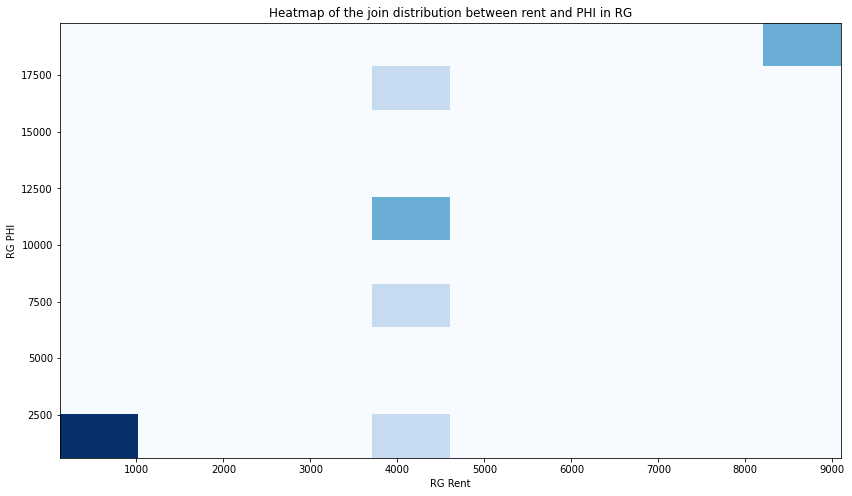

In [12]:
plt.hist2d(x=rg4['dist'],y=rg4['PHI_dist'],cmap='Blues',bins=10)
plt.title("Heatmap of the join distribution between rent and PHI in RG")
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

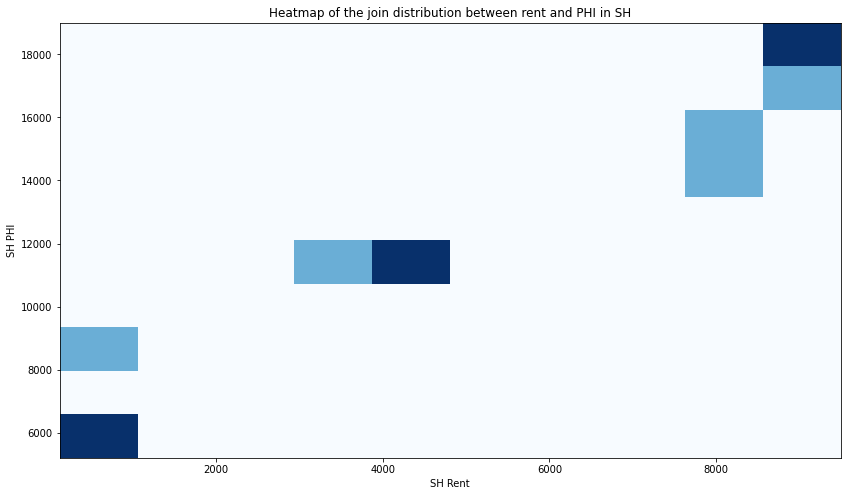

In [13]:
plt.hist2d(x=sh4['dist'],y=sh4['PHI_dist'],cmap='Blues',bins=10)
plt.title("Heatmap of the join distribution between rent and PHI in SH")
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [14]:
np.random.seed(999)

X = np.random.multinomial(size = 100, n = 20, pvals=[0.2,  0.1,  0.1,  0.1,  0.2,  0.3])
Y = X[:,[1,2,3]].sum(axis=1)


In [15]:
emp_cent_mom_3 = (np.power((Y - Y.mean()), 3)).sum() / Y.shape[0]
emp_cent_mom_3

1.7280000000000026

$Y = X_2 + X_3 + X_4 \sim B(20, p_2 + p_3 + p_4) = B(20, 0.3)$

The formula seen in class states that the empirical centralized third moment of the binomial distribution is $ np(1-p)(1-2p)$

In [16]:
n = 20 
p = 0.3 
binom_n_p_emp_cent_mom_3 = n * p * (1 - p) * (1 - 2 * p)
binom_n_p_emp_cent_mom_3

1.6799999999999997

In [17]:
print("Distance between the third moment that we expect from the formula and from a randomly generated Y: " +
      f"{abs(emp_cent_mom_3 - binom_n_p_emp_cent_mom_3)}")

Distance between the third moment that we expect from the formula and from a randomly generated Y: 0.04800000000000293


Notice that we have chosen a seed which we chose to be 666 and happens to leads to the Y vector which yields a third moment of 1.728. This is very close to the theoretical 1.68. However it is not true that every seed will produce a third moment that generates a value close to the theoretical one on k = 100. On the other hand, as we increase k, the experiment automatically converges to the theoretical value 1.68

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

$V(X+Y+Z) = V((X+Y)+Z) = V(X+Y) + V(Z) + 2Cov(X+Y, Z)$

 By bilinearity: 
 $$ = V(X) + V(Y) + V(Z) + 2Cov(X, Z) + 2Cov(Y, Z) + 2Cov(X, Y) \ \ \ \ (2)$$

If X, Y and Z are pairwise independent then each of the covariance pair (except $Cov(D,D)$ where $D \in \{X,Y,Z\}$) is 0. This implies that $V(X+Y+Z) =  V(X) + V(Y) + V(Z)$ by (2).

Let $X, Y \sim B(1,0.5)$ and $Z = X \oplus Y$

$P(X=x) = P(Y=y) = P(Z=z) = \dfrac{1}{2}, P(X=x, Y=y) = P(X=x, Y=y) =  P(X=x, Y=y) = \dfrac{1}{4}$ 

$= \dfrac{1}{2} \cdot \dfrac{1}{2} =  P(D_1=d_1)P(D_2=d_2) $ where $D_1, D_2 \in \{X,Y,Z\}$ clearly showing parwise independence.

Now consider $P(X=0,Y=0,Z=1) = 0$ as $ 0 \oplus 0 = 0 \neq 1$ but $P(X=0)P(Y=0)P(Z=1)=\dfrac{1}{2} \cdot \dfrac{1}{2} \cdot \dfrac{1}{2} = \dfrac{1}{8} \neq 0$ proving that they are not collectively dependent $\square$.




### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [18]:
def NFoldConv(P , n, sum_of_indexes = False):
    if n == 1:
        return {(key,): val for key, val in P.items()}
    n_minus_1_fold = NFoldConv(P , n-1)
    res = defaultdict(int)
    for i_key, i_val in P.items():
        for j_key, j_val in n_minus_1_fold.items():
            temp_key = j_key + (i_key,)
            if sum_of_indexes:
                key = sum(temp_key)
            else:
                key = tuple(sorted(temp_key))
            res[key] += i_val * j_val
    return res

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


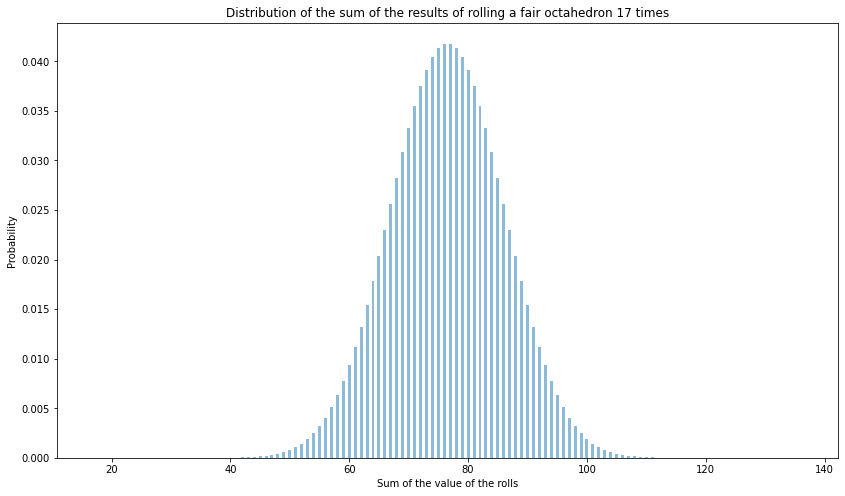

In [22]:
P={i : 1/8 for i in range(1, 9)}

n=17

res = NFoldConv(P, n, sum_of_indexes = True)


plt.bar(res.keys(), res.values(), align="center", width=0.5, alpha=0.5)
plt.title("Distribution of the sum of the results of rolling a fair octahedron 17 times") 
plt.xlabel('Sum of the value of the rolls')
plt.ylabel('Probability')
plt.show()